# 2292번 - 벌집
Copyright : https://www.acmicpc.net/problem/2292

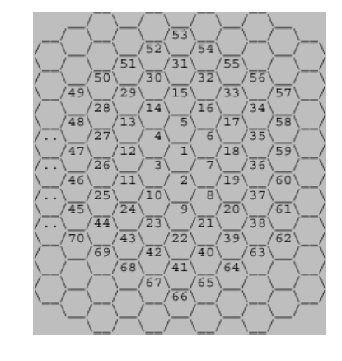

In [8]:
# plot url-image using matplotlib and urllib2.
# Reference : https://stackoverflow.com/questions/12116050/how-to-plot-remote-image-from-http-url
import urllib2
import matplotlib.pyplot as plt
%matplotlib inline

# create a file-like object from the url
f = urllib2.urlopen("https://t1.daumcdn.net/cfile/tistory/99AA95485AF3D2440E")

# read the image file in a numpy array
a = plt.imread(f)
figure = plt.figure(figsize=(6,6))
plt.imshow(a, cmap='gray')
plt.axis('off')
plt.show()

위의 그림과 같이 육각형으로 이루어진 벌집이 있다. 그림에서 보는 바와 같이 중앙의 방 1부터 시작해서 이웃하는 방에 돌아가면서 1씩 증가하는 번호를 주소로 매길 수 있다. 숫자 N이 주어졌을 때, 벌집의 중앙 1에서 N번 방까지 최소 개수의 방을 지나서 갈 때 몇 개의 방을 지나가는지(시작과 끝을 포함하여)를 계산하는 프로그램을 작성하시오. 예를 들면, 13까지는 3개, 58까지는 5개를 지난다.

**입력**
---
첫째 줄에 N(1 ≤ N ≤ 1,000,000,000)이 주어진다.

**출력**
---
입력으로 주어진 방까지 최소 개수의 방을 지나서 갈 때 몇 개의 방을 지나는지 출력한다.

# 풀이

숫자가 증가할수록 각 방의 총 길이가 6의 배수로 증가한다는 규칙은 알았다.<br>
그러나 while문 안에 for문을 만들어서 코드를 짰는데 연산시간이 너무 오래 걸려서 번번히 시간을 초과했다. <br>
그래서 [\[알고리즘\] 벌집 - 백준 온라인 저지](http://a-tothe-z.tistory.com/17) 솔루션을 참고했다. <br>
전체적으로 비슷했는데 이 분과 나의 차이점은 temp와 N을 직접 비교하냐마냐였다. 나는 직접 비교하지 않고 <br>
6\*count에 나누어 떨어질 때마다 count를 올려서 count 자체를 반환하려고 했다. 하지만 이는 반복문을 추가로 요구했기에 적합하지 않았다.<br>
아래 대로 코드를 작성한 결과 정답 처리되었다. <br>
현재 밑의 알고리즘이 머릿속에서 자동으로 돌아가지 않아서 완전히 흡수했다고 생각하지 않는다. <br>
규칙 발견 과정, 알고리즘 도입, 머릿속에서 실행하는 과정을 내것으로 만들어야 한다. <br>

In [9]:
# 거쳐간 방 개수를 구하는 함수
def func(N):
    '''
    입력 : N. 방 번호
    출력 : i. N번째 방이 i번째 육각형 위에 놓여 있다는 걸 의미. 
    '''
    tmp = 1 # N번째 방이 어느 육각형 위에 놓인지 알아내기 위한 비교 변수
    i = 0 
    
    while(1):
        if N == 1: # N이 1일 경우, 거쳐간 방은 1개이므로 종료
            return 1
        if tmp < N: # tmp가 방번호 N보다 작을 경우
            i+=1 # 육각형의 위치 한칸 이동
            tmp += i*6 # 새로운 방번호는 6의 배수가 더해지는 규칙이 있다.
        else: # tmp가 방번호 N을 넘어설 경우 종료. 이 경우 N번째 방이 놓인 육각형 i를 찾게 된다.
            break
    return i+1 # i가 0에서 시작했으므로 반환할 때 1을 더해주었다. (이 줄은 break문 대신 else: 밑으로 옮겨도 될 것 같다.)


N = int(raw_input()) # 숫자 N 입력 받기. 카카오 코드 페스티벌 대회에 참가해 본 바, 입력을 raw_input()으로 받는 걸 알 수 있었다.
print(func(N)) #  결과 출력

13
3
